<a href="https://colab.research.google.com/github/jurados/NotesPytorch/blob/main/%5B6%5D_Etapas_de_un_Proyecto_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

# Etapas de un Proyecto Deep Learning

Autos MPG se llama el _dataset_ la idea es predecir la eficiencia de vehículos entre 1970 y 1980. La industria automovilística aumento las millas por galón (MPG) de sus coches al focarse en automóviles de cuatro cilindros y hacerlos más eficientes en combustible.
Lista de variables:

- _Miles per Gallon_: variable continua
- _cylinders_: variable discreta de valores múltiples
- _displacement_: variable continua
- _horsepower_: variable continua
- _weight_: variable continua
- _acceleration_: variable continua
- _model year_: variable discreta de valores múltiples
- _origin_: variable categórica

Los datos de entrada del modelon son: _cylinders_, _displacement_, _horsepower_, _weight_, _acceleration_, _model year_ y _origin_, y como datos de salida _Miles per Gallon_ (mpg).


In [ ]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
dataset_path = tf.keras.utils.get_file("auto-mpg.data","https://archive.ics.uci.edu/ml/machine-learning-\
databases/auto-mpg/auto-mpg.data")

   8192/Unknown - 0s 0us/step

In [ ]:
column_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration',
                'model_year','origin']

raw_dataset = pd.read_csv(dataset_path,names=column_names,na_values ="?",
                          comment='\t',sep=" ",skipinitialspace=True)

dataset = raw_dataset.copy()

In [ ]:
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
print(dataset.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [ ]:
dataset = dataset.dropna()

In [ ]:
origin = dataset.pop('origin')
dataset['usa'] = (origin == 1)*1.0
dataset['europe'] = (origin == 2)*1.0
dataset['japan'] = (origin == 3)*1.0

In [ ]:
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


Los datos normalmente se dividen en dos grupos: datos de entrenamiento (_training_) y datos de prueba (_test_). A su vez, una parte de los datos de entrenamiento se reservan como datos de validación (_validation_).

Los datos de entramineto que nos quedan después de sacar los de validación y prubea son los que se usan para que el algoritmo de aprendizaje calcule los parámetros del modelo, mientras que los de validación se usan para afinar los hiperparámetros.

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state = 0)

In [ ]:
train_dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
146,28.0,4,90.0,75.0,2125.0,14.5,74,1.0,0.0,0.0
282,22.3,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
69,12.0,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0
378,38.0,4,105.0,63.0,2125.0,14.7,82,1.0,0.0,0.0
331,33.8,4,97.0,67.0,2145.0,18.0,80,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,1.0,0.0,0.0
229,16.0,8,400.0,180.0,4220.0,11.1,77,1.0,0.0,0.0
150,26.0,4,108.0,93.0,2391.0,15.5,74,0.0,0.0,1.0
145,32.0,4,83.0,61.0,2003.0,19.0,74,0.0,0.0,1.0


In [ ]:
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_labels =  train_dataset.pop('mpg')
test_labels =  test_dataset.pop('mpg')

In [ ]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
model_year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
usa,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']

In [ ]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
normed_train_stats = normed_train_data.describe().transpose()
normed_train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,1.824443e-16,1.0,-1.457657,-0.869348,-0.869348,1.483887,1.483887
displacement,314.0,8.627211e-17,1.0,-1.220325,-0.860894,-0.424785,0.675074,2.489002
horsepower,314.0,-9.900078e-18,1.0,-1.545283,-0.751241,-0.272190,0.607162,3.153347
weight,314.0,-8.485781e-17,1.0,-1.589352,-0.869478,-0.198782,0.732017,2.547401
acceleration,314.0,-5.148041e-16,1.0,-2.710152,-0.630725,-0.021237,0.588250,3.313017
model_year,314.0,9.772791e-16,1.0,-1.604642,-0.788458,0.027726,0.843910,1.660094
usa,314.0,7.920062e-17,1.0,-1.286751,-1.286751,0.774676,0.774676,0.774676
europe,314.0,1.980016e-17,1.0,-0.465148,-0.465148,-0.465148,-0.465148,2.143005
japan,314.0,5.374328e-17,1.0,-0.495225,-0.495225,-0.495225,-0.495225,2.012852


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_model():
  model = Sequential()
  model.add(Dense(units=64, activation='relu',
                  input_shape=[len(train_dataset.keys())]))
  model.add(Dense(units=64, activation='relu'))
  model.add(Dense(units=1))

  return model

model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


La función de perdida, basada en una metrica de rendimiento, debe coincidir con el tipo de problema que estamos tratando de resolver. Una medida de rendimiento típico para un problema de regresión es la raíz del error cuadrático medio. (_root mean square error_) (MSE), es la raíz cuadrada de la suma ponderada del cuadrado de las diferencias entre los valores previstos  los valores observados.

$$\text{MSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n} \left(Y_{i} - \hat{Y}_{i}\right)^{2}}$$

En algunos contexto puede usarse otra función, el error absoluto medio (_mean absolute error_) (MAE), también llamado promedio absoluto de la desviación

$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n} \left|Y_{i} - \hat{Y}_{i}\right|$$

MAE es más robusto para los valores atípicos, mientras que MSE es más útil si nos preocupan los errores grandes cuyas consecuencias son mucho mayores que los errores equivalentes más pequeños.

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

In [ ]:
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae','mse'])

In [ ]:
EPOCHS=1000

history = model.fit(normed_train_data, train_labels, epochs = EPOCHS,
                    validation_split=0.2, verbose=1)

Epoch 1/1000
8/8 [==============================] - 1s 40ms/step - loss: 568.3926 - mae: 22.5225 - mse: 568.3926 - val_loss: 560.8876 - val_mae: 22.3056 - val_mse: 560.8876
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 522.4918 - mae: 21.4917 - mse: 522.4918 - val_loss: 510.6248 - val_mae: 21.1828 - val_mse: 510.6248
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 474.4614 - mae: 20.3844 - mse: 474.4614 - val_loss: 453.8136 - val_mae: 19.8633 - val_mse: 453.8136
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 421.3310 - mae: 19.1068 - mse: 421.3310 - val_loss: 392.4258 - val_mae: 18.3415 - val_mse: 392.4258
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: 362.3999 - mae: 17.6112 - mse: 362.3999 - val_loss: 325.6694 - val_mae: 16.5419 - val_mse: 325.6694
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 300.5682 - mae: 15.8954 - mse: 300.5682 - val_loss: 259.0493 - val_

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.453055,0.983650,2.453055,8.948721,2.349622,8.948721,995
996,2.635476,1.055700,2.635476,9.065580,2.354297,9.065580,996
997,2.523322,1.022820,2.523322,9.235741,2.394862,9.235741,997
998,2.496246,0.989931,2.496246,9.176134,2.362936,9.176134,998
999,2.569590,1.009188,2.569590,9.354134,2.422047,9.354134,999


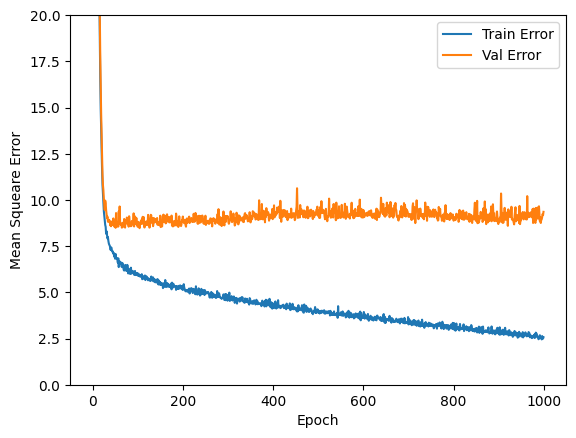

In [ ]:
def plot_history(history):

  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squeare Error')
  plt.plot(hist['epoch'],hist['mse'],label='Train Error')
  plt.plot(hist['epoch'],hist['val_mse'],label='Val Error')

  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

**Overfitting:** El concepto de sobreajuste de un modelo, se produce cuando el modelo obtenido se ajusta tanto a los ejemplos etiquetas de entrenamiento que no puede realizar las predicciones correctas en ejemplos de datos nuevos que nunca ha visto antes.

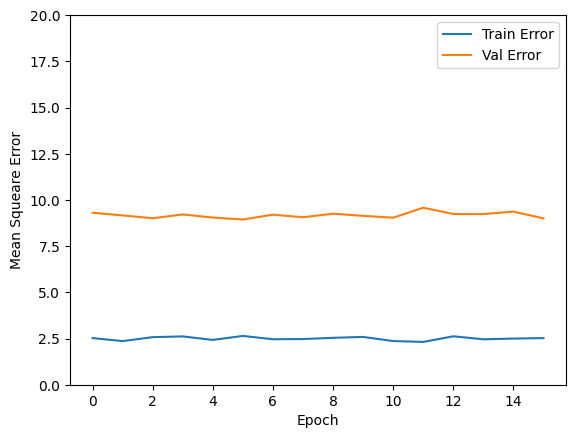

In [ ]:
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae','mse'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

history = model.fit(normed_train_data, train_labels, epochs = EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop])

plot_history(history)

Evaluar el modelo

In [ ]:
loss, mse, mae = model.evaluate(normed_test_data, test_labels)
print('Testing set Mean Abs Error: {:5.2f} mpg'.format(mae))
print('Testing set Mean Sqr Error: {:5.2f} mpg'.format(mse))

3/3 [==============================] - 0s 5ms/step - loss: 5.6963 - mae: 1.8765 - mse: 5.6963
Testing set Mean Abs Error:  5.70 mpg
Testing set Mean Sqr Error:  1.88 mpg


In [ ]:
model.compile(loss='mae',
              optimizer=optimizer,
              metrics=['mae','mse'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

history = model.fit(normed_train_data, train_labels, epochs = EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop])

plot_history(history)

KeyError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 544, in minimize
        self.apply_gradients(grads_and_vars)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients
        iteration = self._internal_apply_gradients(grads_and_vars)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients
        return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn
        distribution.extended.update(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1342, in apply_grad_to_update_var  **
        return self._update_step(grad, var)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 233, in _update_step
        raise KeyError(

    KeyError: 'The optimizer cannot recognize variable dense_3/kernel:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.RMSprop.'


In [ ]:
loss, mse, mae = model.evaluate(normed_test_data, test_labels)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Sqr Error: {:5.2f} MPG".format(mse))

3/3 [==============================] - 0s 5ms/step - loss: 23.8804 - mae: 23.8804 - mse: 637.1132
Testing set Mean Abs Error: 637.11 MPG
Testing set Mean Sqr Error: 23.88 MPG
